## W3 - UNC Example:

Author: Chris Kennedy

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source

### Data Preparation and Loading

In [2]:
df = pd.read_excel(r'W3 - UNC Choice Data.xlsx')

In [3]:
y = df['UNC?']
X = df.drop(columns=['Applicant','Choice','UNC?'])

In [4]:
X.head()

,GMAT,Private University,BB IQ
0,655,1,67
1,660,1,18
2,660,1,6
3,662,0,54
4,662,0,8


## Logistic Regression

### Model Build

In [5]:
clr = LogisticRegression(solver="lbfgs", penalty='none', random_state=42)
clr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Output coefficients

In [6]:
print("[Intercept] ", X.columns)
print(clr.intercept_, clr.coef_)

[Intercept]  Index(['GMAT', 'Private University', 'BB IQ'], dtype='object')
[-70.19463525] [[0.09371534 1.68162487 0.06182431]]


Prediction and scoring

In [7]:
yp = clr.predict(X)
y_score = clr.decision_function(X)
print(y_score)

[-2.9872368  -5.54805153 -6.2899433  -4.81657042 -7.66048887 -1.82488858
 -2.93576851 -1.88083971 -2.80820442 -1.87888198 -3.7635447  -3.1413861
 -2.78280861  0.81732773 -2.30186354  1.96792959  0.59934175 -2.83092883
 -1.03606599 -0.0728948  -2.54586737  1.79616074 -1.82412025  1.83588268
  0.40742824 -0.14703286  2.11053348  2.48147936  6.11350672  1.27884182
  3.75768758  4.7293117   1.59775203  1.47997659  4.88031387]


### Performance Metrics

In [8]:
tn, fp, fn, tp = confusion_matrix(y, yp).ravel()

In [9]:
print("Confusion Matrix:")
print("%32s" % "Predicted")
print("%17s" % " ", "%8s" % "UNC", "%8s" % "Duke")
print("%8s" % "Actual", "%8s" % "UNC", "%8i" % tp, "%8i" % fn)
print("%8s" % " ", "%8s" % "Duke", "%8i" % fp, "%8i" % tn)
print("")
print("Accuracy:    %6.1f%%" % ((tp+tn)/(tp+tn+fp+fn)*100))
print("Sensitivity: %6.1f%%" % (tp/(tp+fn)*100))
print("Specificity: %6.1f%%" % (tn/(tn+fp)*100))

Confusion Matrix:
                       Predicted
                       UNC     Duke
  Actual      UNC       13        2
             Duke        2       18

Accuracy:      88.6%
Sensitivity:   86.7%
Specificity:   90.0%


In [10]:
fpr, tpr, thresholds = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

### Plots

In [11]:
import matplotlib.pyplot as plt

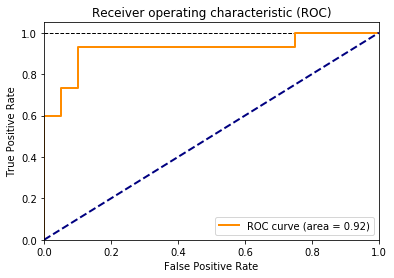

In [12]:
plt.figure()
plt.plot([0, 1],[1,1], color='black', linestyle='--', lw=1)
plt.plot(fpr,tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc, lw=2)
plt.plot([0, 1],[0,1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Decision Trees

In [13]:
dt = tree.DecisionTreeClassifier(random_state = 42, criterion="gini", splitter="best", max_depth=2)
dt = dt.fit(X, y)

#### Describe the tree

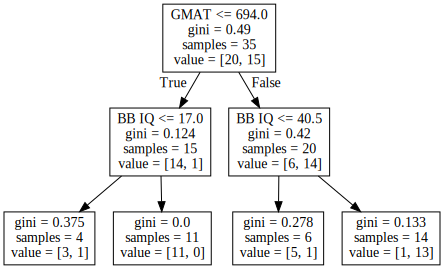

In [14]:
export_graphviz(dt, out_file="outfile.dot", feature_names=X.columns)
Source.from_file("outfile.dot")

For each box [a, b] corresponds to counts for [false, true] or [0, 1]

#### Prediction and Scoring

In [15]:
ypt = dt.predict(X)
ypt_raw = dt.predict_proba(X)

#### Performance Metrics

In [16]:
tnt, fpt, fnt, tpt = confusion_matrix(y, ypt).ravel()

In [17]:
print("Confusion Matrix:")
print("%32s" % "Predicted")
print("%17s" % " ", "%8s" % "UNC", "%8s" % "Duke")
print("%8s" % "Actual", "%8s" % "UNC", "%8i" % tpt, "%8i" % fnt)
print("%8s" % " ", "%8s" % "Duke", "%8i" % fpt, "%8i" % tnt)
print("")
print("Accuracy:    %6.1f%%" % ((tpt+tnt)/(tpt+tnt+fpt+fnt)*100))
print("Sensitivity: %6.1f%%" % (tpt/(tpt+fnt)*100))
print("Specificity: %6.1f%%" % (tnt/(tnt+fpt)*100))

Confusion Matrix:
                       Predicted
                       UNC     Duke
  Actual      UNC       13        2
             Duke        1       19

Accuracy:      91.4%
Sensitivity:   86.7%
Specificity:   95.0%


In [18]:
fprt, tprt, thresholdst = roc_curve(y, ypt_raw[:,1])
roc_auct = auc(fprt, tprt)

#### Plots

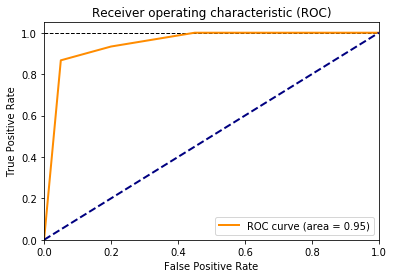

In [19]:
plt.figure()
plt.plot([0, 1],[1,1], color='black', linestyle='--', lw=1)
plt.plot(fprt,tprt, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auct, lw=2)
plt.plot([0, 1],[0,1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### End of Notebook!